# **Importing all the libraries that are required**

In [60]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# **This step is to import the dataset into colab**

In [61]:
from google.colab import files
uploaded = files.upload()


Saving dataset.xlsx to dataset (1).xlsx


# **Now let's explore the data**

In [62]:
#read dataset
df = pd.read_excel('dataset.xlsx')
#head displays the first five rows of the dataframe by default 
df.head()

,Transaction date,House Age,Distance from nearest Metro station (km),Number of convenience stores,latitude,longitude,Number of bedrooms,House size (sqft),House price of unit area
0,2012.916667,32.0,84.87882,10,24.98298,121.54024,1,575,37.9
1,2012.916667,19.5,306.59470,9,24.98034,121.53951,2,1240,42.2
2,2013.583333,13.3,561.98450,5,24.98746,121.54391,3,1060,47.3
3,2013.500000,13.3,561.98450,5,24.98746,121.54391,2,875,54.8
4,2012.833333,5.0,390.56840,5,24.97937,121.54245,1,491,43.1


In [63]:
#columns returns the label of each column in the DataFrame
df.columns

Index(['Transaction date', 'House Age',
       'Distance from nearest Metro station (km)',
       'Number of convenience stores', 'latitude', 'longitude',
       'Number of bedrooms', 'House size (sqft)', 'House price of unit area'],
      dtype='object')

In [64]:
#info prints information about the DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 9 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Transaction date                          414 non-null    float64
 1   House Age                                 414 non-null    float64
 2   Distance from nearest Metro station (km)  414 non-null    float64
 3   Number of convenience stores              414 non-null    int64  
 4   latitude                                  414 non-null    float64
 5   longitude                                 414 non-null    float64
 6   Number of bedrooms                        414 non-null    int64  
 7   House size (sqft)                         414 non-null    int64  
 8   House price of unit area                  414 non-null    float64
dtypes: float64(6), int64(3)
memory usage: 29.2 KB


In [65]:
#df. isna(). sum() returns the number of missing values in each column
df.isna().sum()

Transaction date                            0
House Age                                   0
Distance from nearest Metro station (km)    0
Number of convenience stores                0
latitude                                    0
longitude                                   0
Number of bedrooms                          0
House size (sqft)                           0
House price of unit area                    0
dtype: int64

## **Let's see the data in histogram**

Text(0.5, 1.0, 'Distribution of House Price per Unit Area')

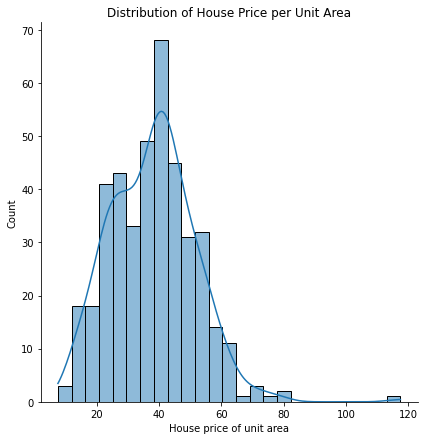

In [66]:
# displot is to represent data in histogram form
sns.displot(data= df, x='House price of unit area' , bins=25 , kde=True, height=6)
plt.title("Distribution of House Price per Unit Area")

Text(0.5, 1.0, 'Distribution Transaction date')

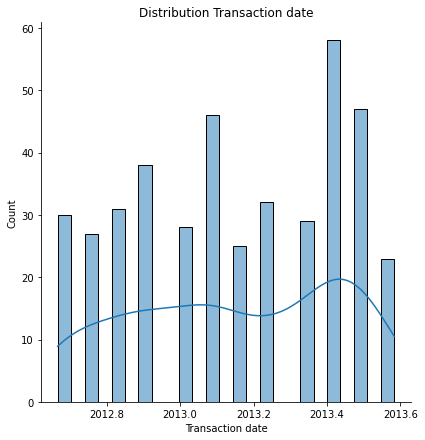

In [67]:
sns.displot(data= df, x='Transaction date' , bins=25 , kde=True, height=6)
plt.title("Distribution Transaction date")

Text(0.5, 1.0, 'Distribution of House Age')

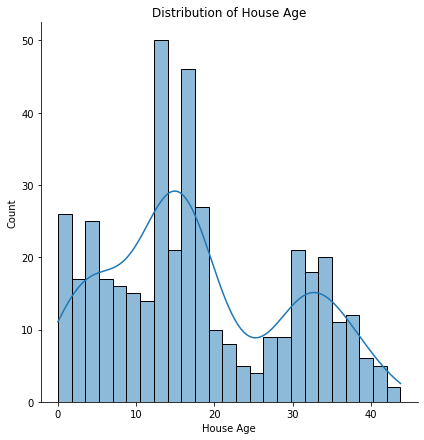

In [68]:
sns.displot(data= df, x='House Age' , bins=25 , kde=True, height=6)
plt.title("Distribution of House Age")

Text(0.5, 1.0, 'Distribution of Distance from nearest Metro station (km)')

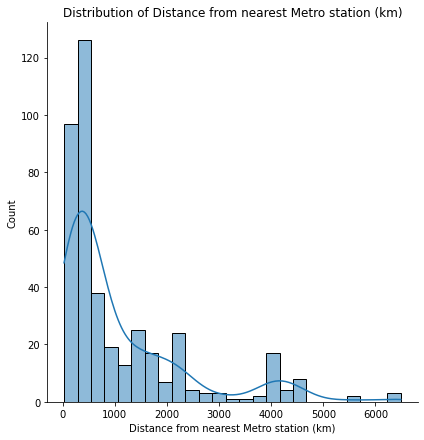

In [69]:
sns.displot(data= df, x='Distance from nearest Metro station (km)' , bins=25 , kde=True, height=6)
plt.title("Distribution of Distance from nearest Metro station (km)")

Text(0.5, 1.0, 'Distribution of Number of convenience stores')

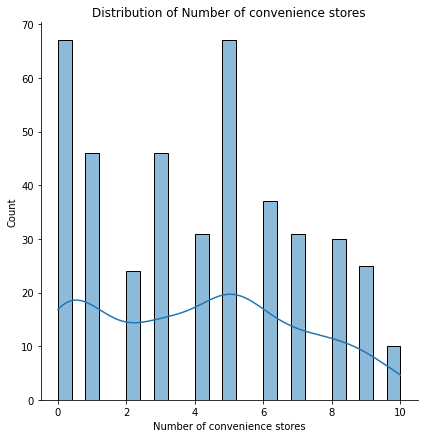

In [70]:
sns.displot(data= df, x='Number of convenience stores' , bins=25 , kde=True, height=6)
plt.title("Distribution of Number of convenience stores")

Text(0.5, 1.0, 'Distribution of latitude')

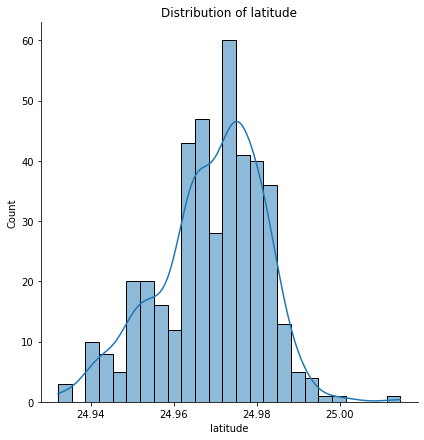

In [71]:
sns.displot(data= df, x='latitude' , bins=25 , kde=True, height=6)
plt.title("Distribution of latitude")

Text(0.5, 1.0, 'Distribution of longitude')

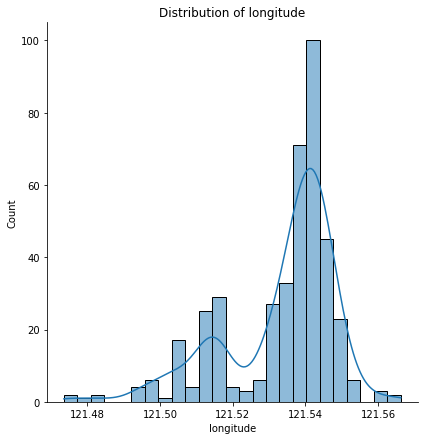

In [72]:
sns.displot(data= df, x='longitude' , bins=25 , kde=True, height=6)
plt.title("Distribution of longitude")

# **Creating the map **


In [73]:
#Importing libraries to plot the data on map
import folium
from folium import Choropleth, Circle, Marker
from folium.plugins import HeatMap, MarkerCluster

In [74]:
# Create a map
city= folium.Map(location=[24.98, 121.52], tiles='Stamen Toner', zoom_start=12)
city

In [75]:
for i in range (0,len(df)):
    lat=df["latitude"][i]
    long=df["longitude"][i]
    folium.Marker(
    [lat, long], ).add_to(city)

In [76]:
city

# **Price prediction**

In [77]:
#importing all libraries
import tensorflow as tf
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping, LambdaCallback

In [78]:
#we use the formula to normalize the data
#x_norm = (x-x_min) / (x_max-x_min)
df = df.iloc[:,1:]
df_norm = (df - df.mean()) / (df.max()-df.min())
df_norm.head()

,House Age,Distance from nearest Metro station (km),Number of convenience stores,latitude,longitude,Number of bedrooms,House size (sqft),House price of unit area
0,0.326197,-0.154534,0.59058,0.169049,0.074174,-0.493961,-0.324659,-0.000730
1,0.040809,-0.120237,0.49058,0.137057,0.066303,0.006039,0.280987,0.038397
2,-0.100743,-0.080732,0.09058,0.223339,0.113747,0.506039,0.117053,0.084803
3,-0.100743,-0.080732,0.09058,0.223339,0.113747,0.006039,-0.051435,0.153046
4,-0.290241,-0.107248,0.09058,0.125302,0.098004,-0.493961,-0.401162,0.046586


In [79]:
#to see the correlation in normalized data
df_norm.corr()

,House Age,Distance from nearest Metro station (km),Number of convenience stores,latitude,longitude,Number of bedrooms,House size (sqft),House price of unit area
House Age,1.000000,0.025622,0.049593,0.054420,-0.048520,-0.008756,-0.060361,-0.210567
Distance from nearest Metro station (km),0.025622,1.000000,-0.602519,-0.591067,-0.806317,-0.046856,0.001795,-0.673613
Number of convenience stores,0.049593,-0.602519,1.000000,0.444143,0.449099,0.043638,0.033286,0.571005
latitude,0.054420,-0.591067,0.444143,1.000000,0.412924,0.043921,0.031696,0.546307
longitude,-0.048520,-0.806317,0.449099,0.412924,1.000000,0.041680,0.009322,0.523287
Number of bedrooms,-0.008756,-0.046856,0.043638,0.043921,0.041680,1.000000,0.752276,0.050265
House size (sqft),-0.060361,0.001795,0.033286,0.031696,0.009322,0.752276,1.000000,0.046489
House price of unit area,-0.210567,-0.673613,0.571005,0.546307,0.523287,0.050265,0.046489,1.000000


In [80]:
#converting back the normalized price to real value of price
y_mean = df['House price of unit area'].mean()
y_std = df['House price of unit area'].std()
def convert_label_value(pred):
    return int(pred * y_std + y_mean)

In [81]:
print(convert_label_value(0.12))

39


# **Creating Training and Testing sets**

Creating Training and Testing sets


In [82]:
#input features
X = df_norm.iloc[:, :6]
X.head()

,House Age,Distance from nearest Metro station (km),Number of convenience stores,latitude,longitude,Number of bedrooms
0,0.326197,-0.154534,0.59058,0.169049,0.074174,-0.493961
1,0.040809,-0.120237,0.49058,0.137057,0.066303,0.006039
2,-0.100743,-0.080732,0.09058,0.223339,0.113747,0.506039
3,-0.100743,-0.080732,0.09058,0.223339,0.113747,0.006039
4,-0.290241,-0.107248,0.09058,0.125302,0.098004,-0.493961


In [83]:
# y value
y = df_norm.iloc[:, -1]
y.head()

0   -0.000730
1    0.038397
2    0.084803
3    0.153046
4    0.046586
Name: House price of unit area, dtype: float64

In [84]:
#Feature and label values
X_arr = X.values
y_arr = y.values

In [85]:
X_train, X_test, y_train, y_test = train_test_split(X_arr, y_arr, test_size = 0.2, shuffle = True, random_state=7)
print('X_train shape: ', X_train.shape)
print('y_train shape: ', y_train.shape)
print('X_test shape: ', X_test.shape)
print('y_test shape: ', y_test.shape)

X_train shape:  (331, 6)
y_train shape:  (331,)
X_test shape:  (83, 6)
y_test shape:  (83,)


# **Creating the Model**

In [86]:
def get_model():
    model = Sequential([
        Dense(5, input_shape = (6,), activation = 'relu'),
        Dense(12, activation = 'sigmoid'),
        Dense(6, activation = 'relu'),
        Dense(1)
    ])
    model.compile(
        loss='mse',
        optimizer='adadelta'
    )
    return model
model = get_model()
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 5)                 35        
                                                                 
 dense_9 (Dense)             (None, 12)                72        
                                                                 
 dense_10 (Dense)            (None, 6)                 78        
                                                                 
 dense_11 (Dense)            (None, 1)                 7         
                                                                 
Total params: 192
Trainable params: 192
Non-trainable params: 0
_________________________________________________________________


# **Training the Model using Train data**

In [87]:
early_stopping = EarlyStopping(monitor='accuracy', patience = 5)
history = model.fit(
    X_train, y_train,
    validation_data = (X_test, y_test),
    epochs = 100,
    callbacks = [early_stopping]
)

Epoch 1/100
 1/11 [=>............................] - ETA: 3s - loss: 0.8006

11/11 [==============================] - 1s 16ms/step - loss: 0.7779 - val_loss: 0.7712
Epoch 2/100
 1/11 [=>............................] - ETA: 0s - loss: 0.7411

11/11 [==============================] - 0s 4ms/step - loss: 0.7773 - val_loss: 0.7706
Epoch 3/100
 1/11 [=>............................] - ETA: 0s - loss: 0.7596

11/11 [==============================] - 0s 4ms/step - loss: 0.7767 - val_loss: 0.7700
Epoch 4/100
 1/11 [=>............................] - ETA: 0s - loss: 0.7304

11/11 [==============================] - 0s 4ms/step - loss: 0.7762 - val_loss: 0.7694
Epoch 5/100
 1/11 [=>............................] - ETA: 0s - loss: 0.7896

11/11 [==============================] - 0s 4ms/step - loss: 0.7756 - val_loss: 0.7688
Epoch 6/100
 1/11 [=>............................] - ETA: 0s - loss: 0.7830

11/11 [==============================] - 0s 7ms/step - loss: 0.7750 - val_loss: 0.7682
Epoch 7/100
 1/11 [=>............................] - ETA: 0s - loss: 0.7999

11/11 [==============================] - 0s 6ms/step - loss: 0.7743 - val_loss: 0.7676
Epoch 8/100
 1/11 [=>............................] - ETA: 0s - loss: 0.8362

11/11 [==============================] - 0s 4ms/step - loss: 0.7737 - val_loss: 0.7670
Epoch 9/100
 1/11 [=>............................] - ETA: 0s - loss: 0.7689

11/11 [==============================] - 0s 4ms/step - loss: 0.7731 - val_loss: 0.7664
Epoch 10/100
 1/11 [=>............................] - ETA: 0s - loss: 0.7661

11/11 [==============================] - 0s 4ms/step - loss: 0.7725 - val_loss: 0.7657
Epoch 11/100
 1/11 [=>............................] - ETA: 0s - loss: 0.7961

11/11 [==============================] - 0s 4ms/step - loss: 0.7718 - val_loss: 0.7651
Epoch 12/100
 1/11 [=>............................] - ETA: 0s - loss: 0.7566

11/11 [==============================] - 0s 4ms/step - loss: 0.7712 - val_loss: 0.7645
Epoch 13/100
 1/11 [=>............................] - ETA: 0s - loss: 0.7988

11/11 [==============================] - 0s 5ms/step - loss: 0.7705 - val_loss: 0.7638
Epoch 14/100
 1/11 [=>............................] - ETA: 0s - loss: 0.7658

11/11 [==============================] - 0s 4ms/step - loss: 0.7699 - val_loss: 0.7631
Epoch 15/100
 1/11 [=>............................] - ETA: 0s - loss: 0.7564

11/11 [==============================] - 0s 4ms/step - loss: 0.7692 - val_loss: 0.7625
Epoch 16/100
 1/11 [=>............................] - ETA: 0s - loss: 0.6910

11/11 [==============================] - 0s 4ms/step - loss: 0.7686 - val_loss: 0.7618
Epoch 17/100
 1/11 [=>............................] - ETA: 0s - loss: 0.7364

11/11 [==============================] - 0s 4ms/step - loss: 0.7679 - val_loss: 0.7611
Epoch 18/100
 1/11 [=>............................] - ETA: 0s - loss: 0.8341

11/11 [==============================] - 0s 6ms/step - loss: 0.7672 - val_loss: 0.7605
Epoch 19/100
 1/11 [=>............................] - ETA: 0s - loss: 0.7519

11/11 [==============================] - 0s 6ms/step - loss: 0.7665 - val_loss: 0.7598
Epoch 20/100
 1/11 [=>............................] - ETA: 0s - loss: 0.7419

11/11 [==============================] - 0s 4ms/step - loss: 0.7659 - val_loss: 0.7591
Epoch 21/100
 1/11 [=>............................] - ETA: 0s - loss: 0.7416

11/11 [==============================] - 0s 6ms/step - loss: 0.7652 - val_loss: 0.7584
Epoch 22/100
 1/11 [=>............................] - ETA: 0s - loss: 0.7948

11/11 [==============================] - 0s 5ms/step - loss: 0.7645 - val_loss: 0.7577
Epoch 23/100
 1/11 [=>............................] - ETA: 0s - loss: 0.7673

11/11 [==============================] - 0s 5ms/step - loss: 0.7638 - val_loss: 0.7570
Epoch 24/100
 1/11 [=>............................] - ETA: 0s - loss: 0.7423

11/11 [==============================] - 0s 5ms/step - loss: 0.7631 - val_loss: 0.7563
Epoch 25/100
 1/11 [=>............................] - ETA: 0s - loss: 0.7348

11/11 [==============================] - 0s 5ms/step - loss: 0.7624 - val_loss: 0.7556
Epoch 26/100
 1/11 [=>............................] - ETA: 0s - loss: 0.8073

11/11 [==============================] - 0s 4ms/step - loss: 0.7616 - val_loss: 0.7549
Epoch 27/100
 1/11 [=>............................] - ETA: 0s - loss: 0.7575

11/11 [==============================] - 0s 6ms/step - loss: 0.7609 - val_loss: 0.7542
Epoch 28/100
 1/11 [=>............................] - ETA: 0s - loss: 0.7999

11/11 [==============================] - 0s 4ms/step - loss: 0.7602 - val_loss: 0.7534
Epoch 29/100
 1/11 [=>............................] - ETA: 0s - loss: 0.6454

11/11 [==============================] - 0s 4ms/step - loss: 0.7595 - val_loss: 0.7527
Epoch 30/100
 1/11 [=>............................] - ETA: 0s - loss: 0.7513

11/11 [==============================] - 0s 5ms/step - loss: 0.7587 - val_loss: 0.7520
Epoch 31/100
 1/11 [=>............................] - ETA: 0s - loss: 0.7674

11/11 [==============================] - 0s 4ms/step - loss: 0.7580 - val_loss: 0.7512
Epoch 32/100
 1/11 [=>............................] - ETA: 0s - loss: 0.8014

11/11 [==============================] - 0s 4ms/step - loss: 0.7573 - val_loss: 0.7505
Epoch 33/100
 1/11 [=>............................] - ETA: 0s - loss: 0.7160

11/11 [==============================] - 0s 4ms/step - loss: 0.7565 - val_loss: 0.7497
Epoch 34/100
 1/11 [=>............................] - ETA: 0s - loss: 0.7413

11/11 [==============================] - 0s 6ms/step - loss: 0.7558 - val_loss: 0.7490
Epoch 35/100
 1/11 [=>............................] - ETA: 0s - loss: 0.7957

11/11 [==============================] - 0s 4ms/step - loss: 0.7550 - val_loss: 0.7482
Epoch 36/100
 1/11 [=>............................] - ETA: 0s - loss: 0.7281

11/11 [==============================] - 0s 6ms/step - loss: 0.7542 - val_loss: 0.7475
Epoch 37/100
 1/11 [=>............................] - ETA: 0s - loss: 0.7534

11/11 [==============================] - 0s 5ms/step - loss: 0.7535 - val_loss: 0.7467
Epoch 38/100
 1/11 [=>............................] - ETA: 0s - loss: 0.7569

11/11 [==============================] - 0s 4ms/step - loss: 0.7527 - val_loss: 0.7459
Epoch 39/100
 1/11 [=>............................] - ETA: 0s - loss: 0.7120

11/11 [==============================] - 0s 4ms/step - loss: 0.7519 - val_loss: 0.7451
Epoch 40/100
 1/11 [=>............................] - ETA: 0s - loss: 0.7460

11/11 [==============================] - 0s 5ms/step - loss: 0.7512 - val_loss: 0.7444
Epoch 41/100
 1/11 [=>............................] - ETA: 0s - loss: 0.7463

11/11 [==============================] - 0s 4ms/step - loss: 0.7504 - val_loss: 0.7436
Epoch 42/100
 1/11 [=>............................] - ETA: 0s - loss: 0.7829

11/11 [==============================] - 0s 5ms/step - loss: 0.7496 - val_loss: 0.7428
Epoch 43/100
 1/11 [=>............................] - ETA: 0s - loss: 0.7933

11/11 [==============================] - 0s 6ms/step - loss: 0.7488 - val_loss: 0.7420
Epoch 44/100
 1/11 [=>............................] - ETA: 0s - loss: 0.8085

11/11 [==============================] - 0s 4ms/step - loss: 0.7480 - val_loss: 0.7412
Epoch 45/100
 1/11 [=>............................] - ETA: 0s - loss: 0.7190

11/11 [==============================] - 0s 4ms/step - loss: 0.7472 - val_loss: 0.7404
Epoch 46/100
 1/11 [=>............................] - ETA: 0s - loss: 0.7732

11/11 [==============================] - 0s 4ms/step - loss: 0.7464 - val_loss: 0.7396
Epoch 47/100
 1/11 [=>............................] - ETA: 0s - loss: 0.7945

11/11 [==============================] - 0s 7ms/step - loss: 0.7456 - val_loss: 0.7388
Epoch 48/100
 1/11 [=>............................] - ETA: 0s - loss: 0.7668

11/11 [==============================] - 0s 5ms/step - loss: 0.7448 - val_loss: 0.7380
Epoch 49/100
 1/11 [=>............................] - ETA: 0s - loss: 0.8211

11/11 [==============================] - 0s 6ms/step - loss: 0.7440 - val_loss: 0.7372
Epoch 50/100
 1/11 [=>............................] - ETA: 0s - loss: 0.7231

11/11 [==============================] - 0s 4ms/step - loss: 0.7432 - val_loss: 0.7364
Epoch 51/100
 1/11 [=>............................] - ETA: 0s - loss: 0.7506

11/11 [==============================] - 0s 4ms/step - loss: 0.7423 - val_loss: 0.7355
Epoch 52/100
 1/11 [=>............................] - ETA: 0s - loss: 0.7752

11/11 [==============================] - 0s 4ms/step - loss: 0.7415 - val_loss: 0.7347
Epoch 53/100
 1/11 [=>............................] - ETA: 0s - loss: 0.7585

11/11 [==============================] - 0s 4ms/step - loss: 0.7407 - val_loss: 0.7339
Epoch 54/100
 1/11 [=>............................] - ETA: 0s - loss: 0.7756

11/11 [==============================] - 0s 6ms/step - loss: 0.7399 - val_loss: 0.7331
Epoch 55/100
 1/11 [=>............................] - ETA: 0s - loss: 0.7416

11/11 [==============================] - 0s 4ms/step - loss: 0.7390 - val_loss: 0.7322
Epoch 56/100
 1/11 [=>............................] - ETA: 0s - loss: 0.7899

11/11 [==============================] - 0s 5ms/step - loss: 0.7382 - val_loss: 0.7314
Epoch 57/100
 1/11 [=>............................] - ETA: 0s - loss: 0.7922

11/11 [==============================] - 0s 4ms/step - loss: 0.7373 - val_loss: 0.7305
Epoch 58/100
 1/11 [=>............................] - ETA: 0s - loss: 0.8023

11/11 [==============================] - 0s 6ms/step - loss: 0.7365 - val_loss: 0.7297
Epoch 59/100
 1/11 [=>............................] - ETA: 0s - loss: 0.7334

11/11 [==============================] - 0s 5ms/step - loss: 0.7357 - val_loss: 0.7289
Epoch 60/100
 1/11 [=>............................] - ETA: 0s - loss: 0.7664

11/11 [==============================] - 0s 4ms/step - loss: 0.7348 - val_loss: 0.7280
Epoch 61/100
 1/11 [=>............................] - ETA: 0s - loss: 0.7020

11/11 [==============================] - 0s 4ms/step - loss: 0.7340 - val_loss: 0.7271
Epoch 62/100
 1/11 [=>............................] - ETA: 0s - loss: 0.7012

11/11 [==============================] - 0s 4ms/step - loss: 0.7331 - val_loss: 0.7263
Epoch 63/100
 1/11 [=>............................] - ETA: 0s - loss: 0.6675

11/11 [==============================] - 0s 4ms/step - loss: 0.7322 - val_loss: 0.7254
Epoch 64/100
 1/11 [=>............................] - ETA: 0s - loss: 0.7188

11/11 [==============================] - 0s 5ms/step - loss: 0.7314 - val_loss: 0.7246
Epoch 65/100
 1/11 [=>............................] - ETA: 0s - loss: 0.6847

11/11 [==============================] - 0s 5ms/step - loss: 0.7305 - val_loss: 0.7237
Epoch 66/100
 1/11 [=>............................] - ETA: 0s - loss: 0.7058

11/11 [==============================] - 0s 4ms/step - loss: 0.7296 - val_loss: 0.7228
Epoch 67/100
 1/11 [=>............................] - ETA: 0s - loss: 0.7034

11/11 [==============================] - 0s 6ms/step - loss: 0.7287 - val_loss: 0.7219
Epoch 68/100
 1/11 [=>............................] - ETA: 0s - loss: 0.7629

11/11 [==============================] - 0s 4ms/step - loss: 0.7279 - val_loss: 0.7211
Epoch 69/100
 1/11 [=>............................] - ETA: 0s - loss: 0.7924

11/11 [==============================] - 0s 6ms/step - loss: 0.7270 - val_loss: 0.7202
Epoch 70/100
 1/11 [=>............................] - ETA: 0s - loss: 0.7966

11/11 [==============================] - 0s 5ms/step - loss: 0.7261 - val_loss: 0.7193
Epoch 71/100
 1/11 [=>............................] - ETA: 0s - loss: 0.7167

11/11 [==============================] - 0s 4ms/step - loss: 0.7252 - val_loss: 0.7184
Epoch 72/100
 1/11 [=>............................] - ETA: 0s - loss: 0.7248

11/11 [==============================] - 0s 6ms/step - loss: 0.7243 - val_loss: 0.7175
Epoch 73/100
 1/11 [=>............................] - ETA: 0s - loss: 0.7362

11/11 [==============================] - 0s 4ms/step - loss: 0.7234 - val_loss: 0.7166
Epoch 74/100
 1/11 [=>............................] - ETA: 0s - loss: 0.7248

11/11 [==============================] - 0s 4ms/step - loss: 0.7225 - val_loss: 0.7157
Epoch 75/100
 1/11 [=>............................] - ETA: 0s - loss: 0.7040

11/11 [==============================] - 0s 5ms/step - loss: 0.7216 - val_loss: 0.7148
Epoch 76/100
 1/11 [=>............................] - ETA: 0s - loss: 0.7773

11/11 [==============================] - 0s 4ms/step - loss: 0.7207 - val_loss: 0.7139
Epoch 77/100
 1/11 [=>............................] - ETA: 0s - loss: 0.6916

11/11 [==============================] - 0s 6ms/step - loss: 0.7198 - val_loss: 0.7130
Epoch 78/100
 1/11 [=>............................] - ETA: 0s - loss: 0.6942

11/11 [==============================] - 0s 4ms/step - loss: 0.7189 - val_loss: 0.7121
Epoch 79/100
 1/11 [=>............................] - ETA: 0s - loss: 0.6147

11/11 [==============================] - 0s 5ms/step - loss: 0.7180 - val_loss: 0.7112
Epoch 80/100
 1/11 [=>............................] - ETA: 0s - loss: 0.6893

11/11 [==============================] - 0s 6ms/step - loss: 0.7171 - val_loss: 0.7103
Epoch 81/100
 1/11 [=>............................] - ETA: 0s - loss: 0.6524

11/11 [==============================] - 0s 6ms/step - loss: 0.7162 - val_loss: 0.7094
Epoch 82/100
 1/11 [=>............................] - ETA: 0s - loss: 0.7373

11/11 [==============================] - 0s 6ms/step - loss: 0.7152 - val_loss: 0.7084
Epoch 83/100
 1/11 [=>............................] - ETA: 0s - loss: 0.7531

11/11 [==============================] - 0s 4ms/step - loss: 0.7143 - val_loss: 0.7075
Epoch 84/100
 1/11 [=>............................] - ETA: 0s - loss: 0.6887

11/11 [==============================] - 0s 4ms/step - loss: 0.7134 - val_loss: 0.7066
Epoch 85/100
 1/11 [=>............................] - ETA: 0s - loss: 0.7377

11/11 [==============================] - 0s 4ms/step - loss: 0.7125 - val_loss: 0.7056
Epoch 86/100
 1/11 [=>............................] - ETA: 0s - loss: 0.7058

11/11 [==============================] - 0s 5ms/step - loss: 0.7115 - val_loss: 0.7047
Epoch 87/100
 1/11 [=>............................] - ETA: 0s - loss: 0.6486

11/11 [==============================] - 0s 4ms/step - loss: 0.7106 - val_loss: 0.7038
Epoch 88/100
 1/11 [=>............................] - ETA: 0s - loss: 0.7355

11/11 [==============================] - 0s 4ms/step - loss: 0.7097 - val_loss: 0.7028
Epoch 89/100
 1/11 [=>............................] - ETA: 0s - loss: 0.7412

11/11 [==============================] - 0s 4ms/step - loss: 0.7087 - val_loss: 0.7019
Epoch 90/100
 1/11 [=>............................] - ETA: 0s - loss: 0.7304

11/11 [==============================] - 0s 4ms/step - loss: 0.7078 - val_loss: 0.7010
Epoch 91/100
 1/11 [=>............................] - ETA: 0s - loss: 0.7060

11/11 [==============================] - 0s 4ms/step - loss: 0.7068 - val_loss: 0.7000
Epoch 92/100
 1/11 [=>............................] - ETA: 0s - loss: 0.7231

11/11 [==============================] - 0s 6ms/step - loss: 0.7059 - val_loss: 0.6991
Epoch 93/100
 1/11 [=>............................] - ETA: 0s - loss: 0.7273

11/11 [==============================] - 0s 7ms/step - loss: 0.7049 - val_loss: 0.6981
Epoch 94/100
 1/11 [=>............................] - ETA: 0s - loss: 0.7152

11/11 [==============================] - 0s 4ms/step - loss: 0.7040 - val_loss: 0.6972
Epoch 95/100
 1/11 [=>............................] - ETA: 0s - loss: 0.6561

11/11 [==============================] - 0s 4ms/step - loss: 0.7030 - val_loss: 0.6962
Epoch 96/100
 1/11 [=>............................] - ETA: 0s - loss: 0.7667

11/11 [==============================] - 0s 7ms/step - loss: 0.7021 - val_loss: 0.6953
Epoch 97/100
 1/11 [=>............................] - ETA: 0s - loss: 0.6502

11/11 [==============================] - 0s 4ms/step - loss: 0.7011 - val_loss: 0.6943
Epoch 98/100
 1/11 [=>............................] - ETA: 0s - loss: 0.7352

11/11 [==============================] - 0s 4ms/step - loss: 0.7002 - val_loss: 0.6934
Epoch 99/100
 1/11 [=>............................] - ETA: 0s - loss: 0.7227

11/11 [==============================] - 0s 6ms/step - loss: 0.6992 - val_loss: 0.6924
Epoch 100/100
 1/11 [=>............................] - ETA: 0s - loss: 0.7036

11/11 [==============================] - 0s 6ms/step - loss: 0.6982 - val_loss: 0.6914


# **Sample Values**

In [88]:
df2 = df["House Age"].std()
print(df2)

11.39248453324253


In [89]:
df2 = df["House Age"].mean()
print(df2)

17.71256038647343


In [90]:
House_Age= 23
House_Age= (House_Age- 17.71256038647343 )/ 11.39248453324253
print(House_Age)

0.4641164618743316


In [91]:
House_price_of_unit_area = 37.9 
House_price_of_unit_area = (House_price_of_unit_area- 37.980193236714975 )/ 37.980193236714975
print(House_price_of_unit_area)

-0.002111448886401511


In [92]:
df2 = df["Distance from nearest Metro station (km)"].mean()
print(df2)

1083.8856889130436


In [93]:
df2 = df["Distance from nearest Metro station (km)"].std()
print(df2)

1262.1095954078512


In [94]:
Distance_from_nearest_Metro_station_km= -0.154534	
Distance_from_nearest_Metro_station_km= (Distance_from_nearest_Metro_station_km- 1083.8856889130436 )/ 1262.1095954078512

In [95]:
df2 = df["longitude"].mean()
print(df2)

121.53336108695655


In [96]:
df2 = df["longitude"].std()
print(df2)

0.015347183004592205


In [97]:
longitude= 230.074174
longitude= (longitude- 121.53336108695655 )/ 0.015347183004592205
print(longitude)

7072.360633255348


In [98]:
df2 = df["longitude"].std()
print(df2)

0.015347183004592205


In [99]:
df2 = df["Number of convenience stores"].mean()
print(df2)

4.094202898550725


In [100]:
df2 = df["Number of convenience stores"].std()
print(df2)

2.945561805663618


In [101]:
Number_of_convenience_stores= 0.59058
Number_of_convenience_stores= (Number_of_convenience_stores- 4.094202898550725 )/ 2.945561805663618
print(Number_of_convenience_stores)

-1.189458286637913


In [102]:
df2 = df["latitude"].mean()
print(df2)

24.969030072463767


In [103]:
df2 = df["latitude"].std()
print(df2)

0.012410196590450338


In [104]:
latitude= 0.169049
latitude= (latitude- 24.969030072463767 )/ 0.012410196590450338
print(latitude)

-1998.3552147390947


In [105]:
df2 = df["Number of bedrooms"].mean()
print(df2)

1.9879227053140096


In [106]:
df2 = df["Number of bedrooms"].std()
print(df2)

0.81887481641297


In [107]:
Number_of_bedrooms= -0.493961
Number_of_bedrooms= (Number_of_bedrooms- 1.9879227053140096 )/ 0.81887481641297
print(Number_of_bedrooms)

-3.030846297344625


In [108]:
df2 = df["House size (sqft)"].mean()
print(df2)

931.475845410628


In [109]:
df2 = df["House size (sqft)"].std()
print(df2)

348.9102691645236


In [110]:
House_size_sqft= -0.324659
House_size_sqft= (House_size_sqft- 931.475845410628)/ 348.9102691645236
print(House_size_sqft)

-2.670602119684964


# **Test Prediction**

In [111]:
test_input= np.array( [[ House_Age, Distance_from_nearest_Metro_station_km, Number_of_convenience_stores, latitude, longitude, House_size_sqft]] )

In [112]:
val= model.predict(test_input)
res=val[0][0]

1/1 [==============================] - 0s 55ms/step


In [113]:
print("The predicted price is=",convert_label_value(res))

The predicted price is= 52
